<a href="https://colab.research.google.com/github/syedaquib153/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_EDA(2)_Aquib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <b><u>Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

**Objective:**

Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by Credit Card Default.

We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

**Importing Libraries**

In [ ]:
#Import Packages and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Mounting Drive**

In [ ]:
# Mouting the drive from Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Upgrading Xlrd**

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


**Reading the Excel File**

In [ ]:
# Reading the excel file using Pandas dataframe

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/excel/default of credit card clients.xls',skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**(1) Description of columns from dataset documentation**

There are 25 variables:
• ID: ID of each client

• LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

• SEX: Gender (1=male, 2=female)

• EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

• MARRIAGE: Marital status (1=married, 2=single, 3=others)

• AGE: Age in years

• PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

• PAY_2: Repayment status in August, 2005 (scale same as above)

• PAY_3: Repayment status in July, 2005 (scale same as above)

• PAY_4: Repayment status in June, 2005 (scale same as above)

• PAY_5: Repayment status in May, 2005 (scale same as above)

• PAY_6: Repayment status in April, 2005 (scale same as above)

• BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

• BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

• BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

• BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

• BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

• BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

• PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

• PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

• PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

• PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

• PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

• PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

• default.payment.next.month: Default payment (1=yes, 0=no)

**Understanding The Data**

In [ ]:
# Checking rows and columns present in file
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Inference : No Null Values found

In [ ]:
df.duplicated('ID').value_counts()

False    30000
dtype: int64

Inference : No Duplicates found

In [ ]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Inference : 1-Male , 2-Female .
Female>Male in terms of counts.

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Inference: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

Educated more in university then in graduate school and highschool


In [ ]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Inference: Marital status (1=married, 2=single, 3=others)

Single>Married, Unmarried status is more then married

In [ ]:
df.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

Inference:Age in years. We can see the age of customer from 21years to 70years


# **Explotory Data Analysis**

**Depended Variable**

we have a depended variable which is 'default payment next month'.

In [ ]:
# Replacing the 'default payment next month' as a 'Default' for a convinience

In [ ]:
df.rename(columns={'default payment next month':'Default'},inplace = True)


**Independent Variables**

***Categorical*** ***Features:***


**Replacing the Numerical Features to Categorical Features**

In [ ]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
#Replacing the Values 
df['EDUCATION']=df['EDUCATION'].replace({5:4,4:4,6:4,0:4})
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Inference: Replaced the Values 4 , 5 , 6 to 0 since we asuumed it as Caterogy 'Others'

In [ ]:
df['MARRIAGE']=df['MARRIAGE'].replace({3:3,0:3})
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Inference: Replaced the Values 3 , 0  to 3 since we asuumed it as Caterogy 'Others'

In [ ]:
# Replacing the numerical features to categorical features for visualision

In [ ]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
df_cato = df[categorical_features]
df_cato['IsDefault'] = df['Default']

In [ ]:
df_cato.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


<Figure size 720x360 with 0 Axes>

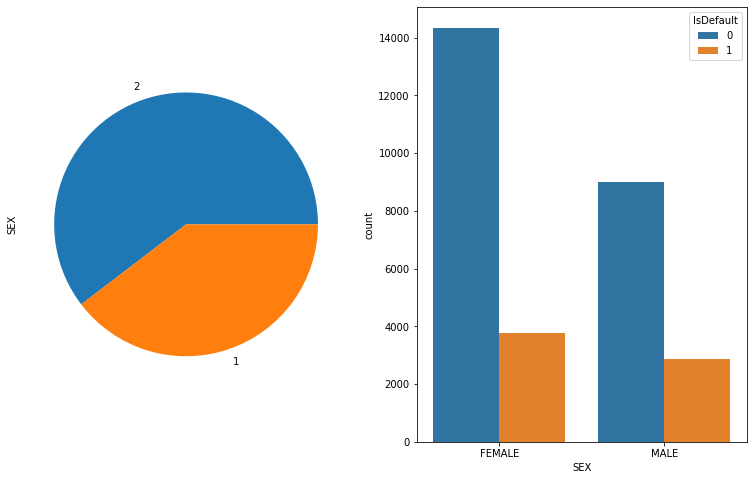

<Figure size 720x360 with 0 Axes>

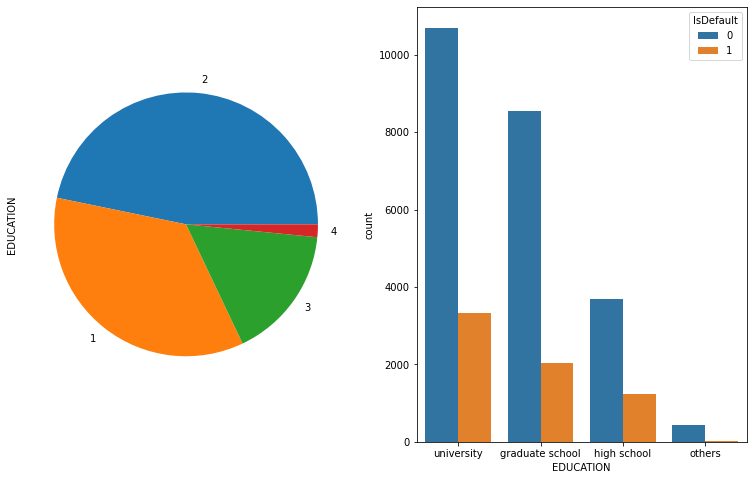

<Figure size 720x360 with 0 Axes>

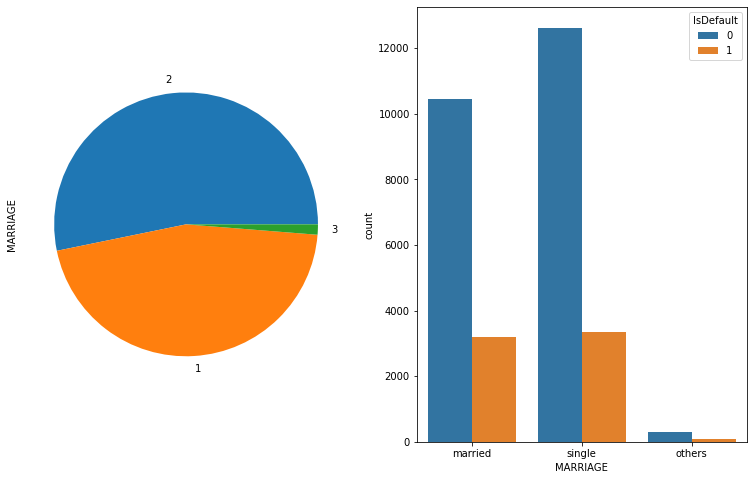

In [ ]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'IsDefault', data = df_cato)

Note: 0- Default , 1-No Default

Inference:


*   There are more proposional of Female candidates with default Values.

*  No of default's are more in Educations (university and Graduates)


  
*    No of default's are more in Single's










***Numerical Features:***

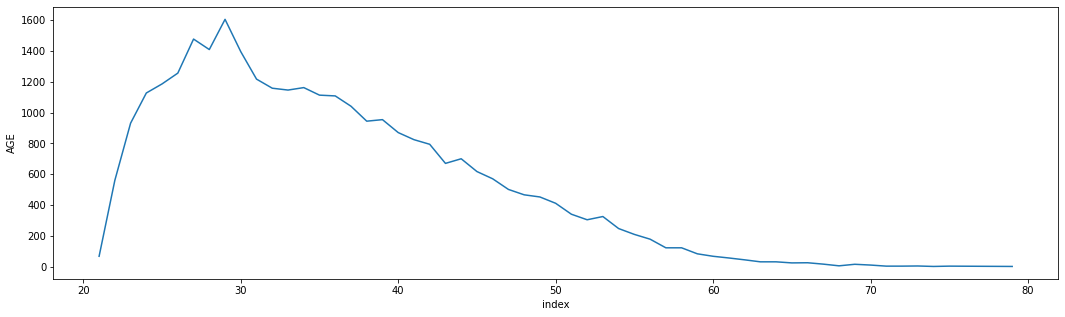

In [ ]:
plt.figure(figsize=(18,5))
Age_df=df['AGE'].value_counts().reset_index()
sns.lineplot(x='index',y='AGE',data=Age_df)

Inference: Customer aged between 30 to 40 has more 'No default' rate while from 50 to 80 has more 'default' rate .

In [ ]:
#renaming columns 
 
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Default'],
      dtype='object')

**History of Repayment Status from May to September**

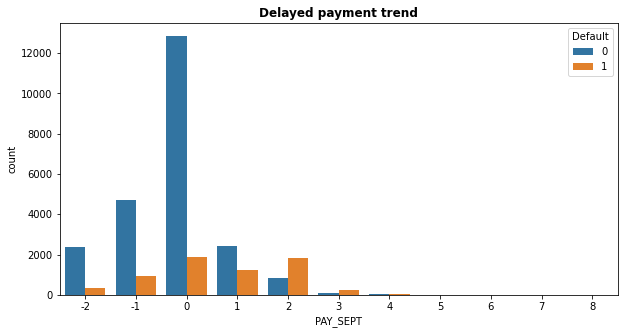

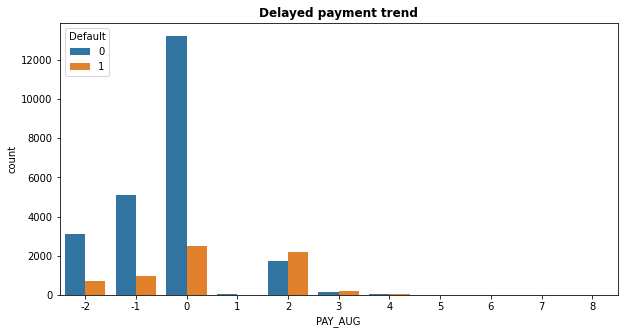

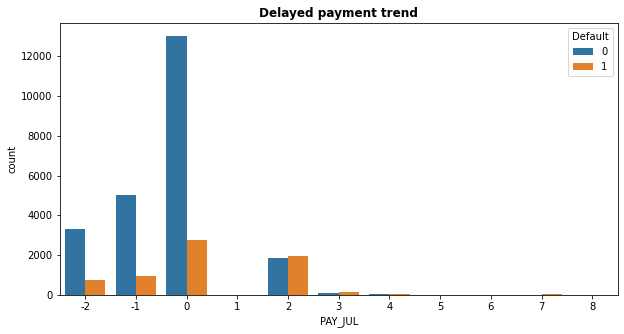

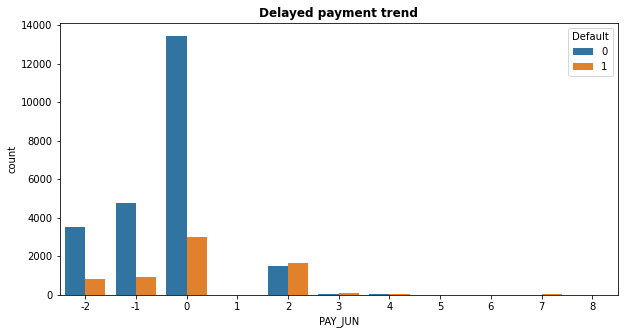

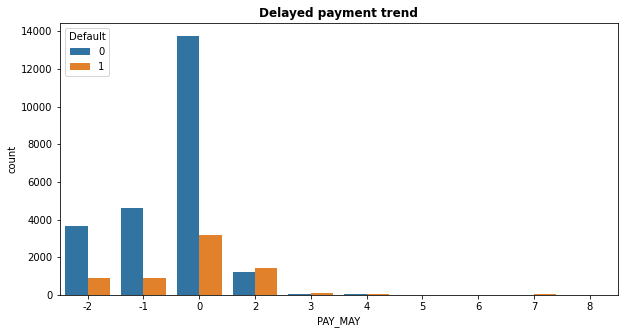

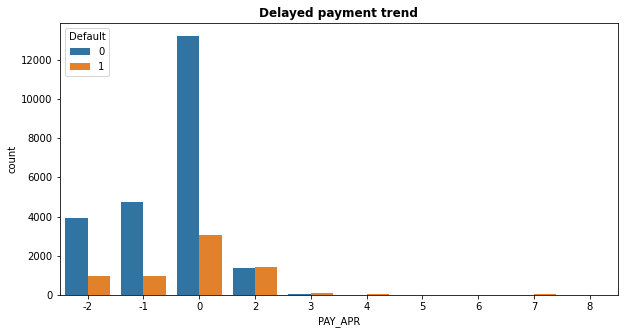

In [ ]:
# Checking correlations between Repayment status and default values
columns = ['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

for col in columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col,hue = 'Default',  data = df)
  plt.title('Delayed payment trend',fontweight='bold')



Inference:

Has the repayment status changed in the 6 month from April 2005 (PAY_6) to September 2005(PAY_0)?
There was a huge jump from May,2005 (PAY_5) to July, 2005 (PAY_3) when delayed payment increased significantly, then it peaked at August, 2005 (PAY_2), things started to get better in September, 2005 (PAY_1).

**Bill Amount**

In [ ]:
pay_amnt_df = df[['PAY_AMT_SEPT',   'PAY_AMT_AUG',  'PAY_AMT_JUL',  'PAY_AMT_JUN',  'PAY_AMT_MAY',  'PAY_AMT_APR', 'Default']]

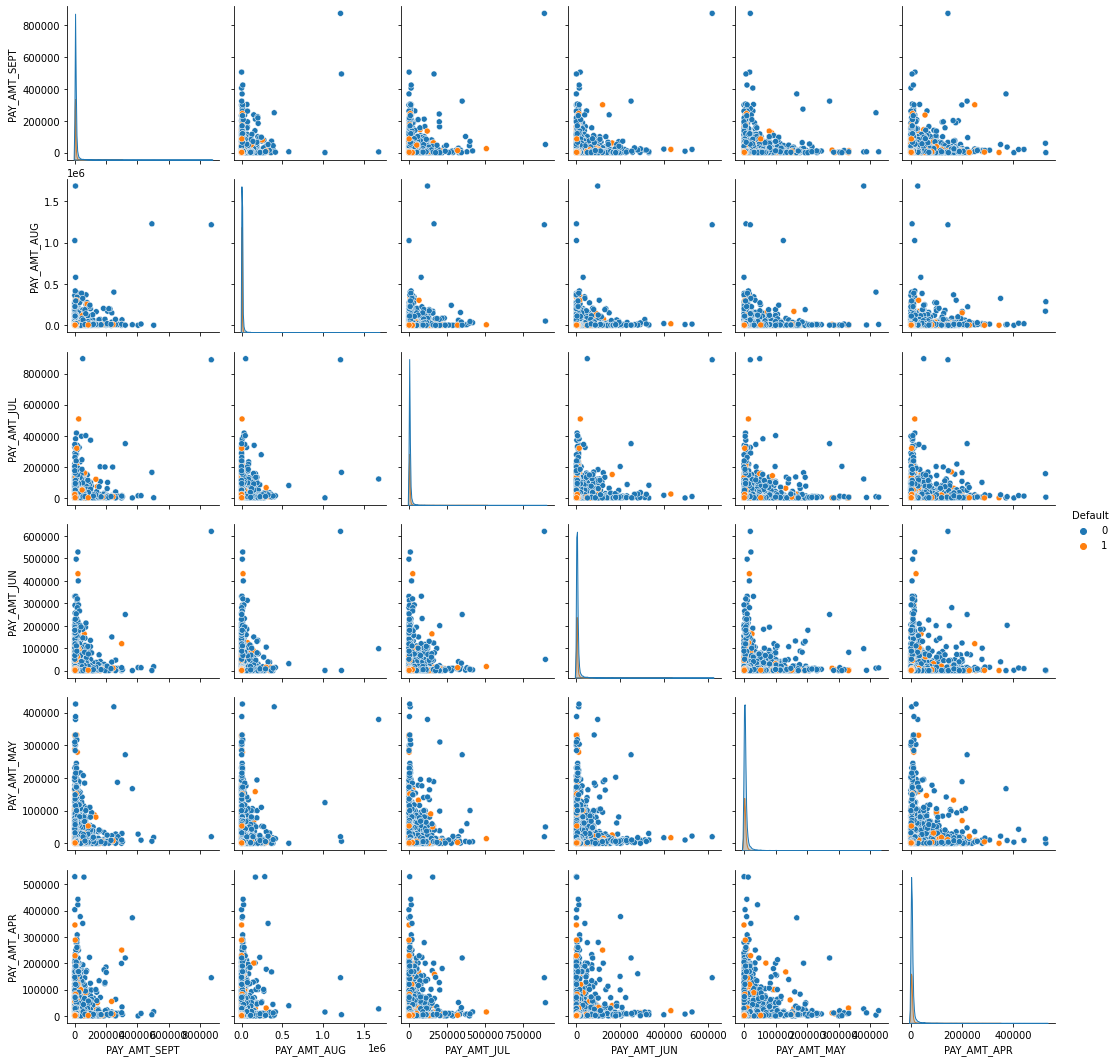

In [ ]:
sns.pairplot(data = pay_amnt_df, hue='Default')

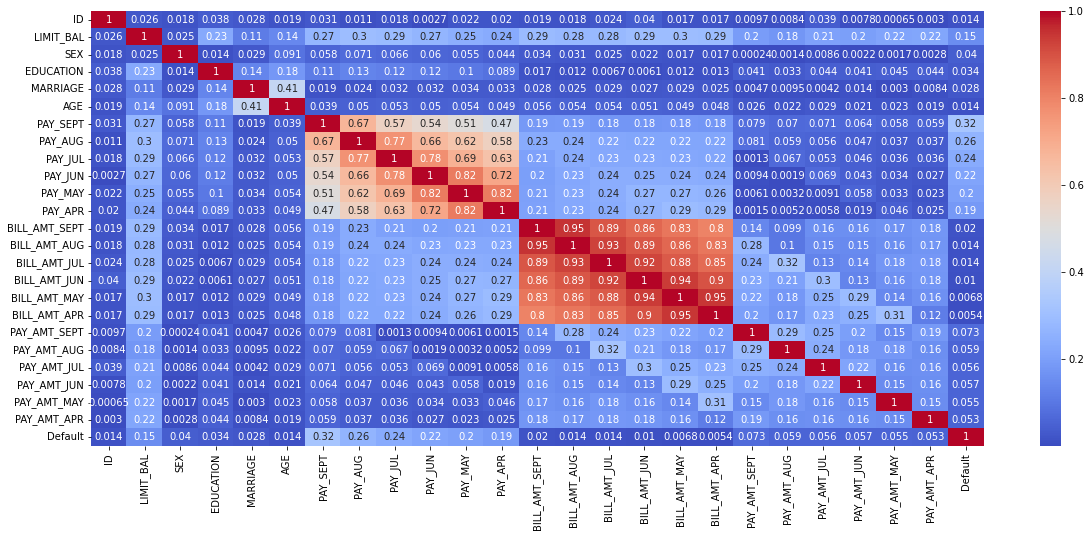

In [ ]:
plt.figure(figsize=(20,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Inference: By using heat map for correlation we can see the correlationship of columns to columns

In [ ]:
bill =df[['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR']]

In [ ]:
bill.describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Inference : We can see negative values in min .

# **Statistical Analysis**

*We will use Statistical Analysis to find the correlation between columns*

Correlation between credit limit and bill amount: **Pearson R**

Correlation between credit limit and payment default: **t-test**

Correlation between education and payment default: **chi-squared test**

Correlation between age and payment default: **chi-squared test**

Correlation between sex and payment default: **chi-squared test**


**Correlation between credit limit and bill amount**

We assume customers who have a high credit limit will have a higher bill amount.

In [ ]:
#Create the dataframe Limit balance
def0 = df.loc[df['Default'] == 0,'LIMIT_BAL']
def1 = df.loc[df['Default'] == 1,'LIMIT_BAL']

***The Pearson correlation coefficient (r)*** is the most common way of measuring a linear correlation.

 It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.



In [ ]:
#imported library 

In [ ]:
from scipy import stats

credit_limit = df['LIMIT_BAL']
bill =df[['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR']].sum(axis=1)

stats.pearsonr(credit_limit, bill)

(0.30204379702615786, 0.0)

Inference : The Pearson R shows there is a positive correlation between these 2 variables.

**Correlation between credit limit and payment default.**

Ideally, we should have customers' income data, but since this data is not available, we can assume higher income customers have higher credit limits. Therefore, we will verify if there is a correlation between credit limit and default payment using t-test.

Null hypothesis: credit limit does not affect default likelihood.

Alternative hypothesis: credit limit impact default likelihood.

Set significance level alpha to 0.05

In [ ]:
no_def_limit = df.loc[df['Default']==0,'LIMIT_BAL']
def_limit = df.loc[df['Default']==1,'LIMIT_BAL']

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html 

**t-test**-This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [ ]:
# import libraries of t-test from scipy.stats

In [ ]:
from scipy import stats
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(mean1=np.mean(no_def_limit),std1=np.std(no_def_limit),nobs1=len(no_def_limit),
                     mean2=np.mean(def_limit),std2=np.std(def_limit),nobs2=len(def_limit))

Ttest_indResult(statistic=26.90935759020854, pvalue=1.2739158026091975e-157)

Inference:We get a p value as 0, therefore we need to reject the null hypothesis and accept the alternative hypothesis. Credit limit has an impact on payment default.

**Correlation between education and payment default.**

Previous visualization indicates education impacts default likelihood. We will use a Chi-squared test to verify this finding.

Null hypothesis: education does not affect default likelihood.

Alternative hypothesis: education impacts default likelihood.

Set significance level alpha to 0.05

**A chi-square test** is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

crosstab(*args[, levels, sparse])

Return table of counts for each possible unique combination in *args.

In [ ]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(df['Default'], df['EDUCATION'], margins=False)

In [ ]:
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

1.495064564810615e-34

Inference: 
Since the p value is close to 0, we will reject the null hypothesis and accept the alternative hypothesis. Because education has a strong correlation with default probability, we should keep this variable in the machine learning model.

***Correlation between age and payment default.***

Previous visualization indicates age impacts default likelihood. We will use a chi-squared test to verify this finding.


Null hypothesis: age does not affect default likelihood.

Alternative hypothesis: age impacts default likelihood.

Set significance level  to 0.05

In [ ]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(df['Default'], df['AGE'], margins=False)

In [ ]:
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

5.6429915495725416e-12

Inference: The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis, which is age has impact on default probability.

**Correlation between sex and payment default.**

Null hypothesis: sex has no impact on default probability.

Alternative hypothesis: sex has impact on default probability.

Set significance level  to 0.05.


In [ ]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(df['Default'], df['SEX'], margins=False)

In [ ]:
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

4.944678999412044e-12

Inference: The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis, which is Sex has impact on default probability.

**Checking data Imbalance**

In [ ]:
df.Default.value_counts()

0    23364
1     6636
Name: Default, dtype: int64

Inference: A data is a Imbalanced data

# As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using **SMOTE(Synthetic Minority Oversampling Technique)**

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
#Importing Libraries 
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# splitting the data 
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['Default'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,23314,188764,1,1,1,47,1,1,1,2,...,37906,38230,38908,39624,1860,2149,1489,1587,1489,1575
46724,19077,50000,2,1,1,31,0,0,0,0,...,11698,14028,18124,19847,2997,5706,6406,7382,3907,1761
46725,9583,90000,2,3,2,23,0,0,0,0,...,44300,43751,44988,44977,2227,2897,1956,2084,1955,3523
46726,14784,10000,1,1,1,44,2,2,6,7,...,2400,2400,2400,2400,0,0,0,0,0,0


In [ ]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Default, Length: 46728, dtype: int64

In [ ]:
columns = list(df.columns)
columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_SEPT',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR',
 'BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR',
 'Default']

In [ ]:
columns.pop()

'Default'

**Independent variable**

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,23314,188764,1,1,1,47,1,1,1,2,...,37906,38230,38908,39624,1860,2149,1489,1587,1489,1575
46724,19077,50000,2,1,1,31,0,0,0,0,...,11698,14028,18124,19847,2997,5706,6406,7382,3907,1761
46725,9583,90000,2,3,2,23,0,0,0,0,...,44300,43751,44988,44977,2227,2897,1956,2084,1955,3523
46726,14784,10000,1,1,1,44,2,2,6,7,...,2400,2400,2400,2400,0,0,0,0,0,0


**Dependent Variable**

In [ ]:
balance_df['Default'] = y_smote

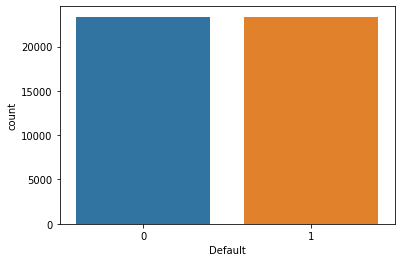

In [ ]:
sns.countplot('Default', data = balance_df)

**Feature Engineering**

In [ ]:
# create new data frame and make copy of Balance data
new_df =balance_df.copy()
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,23314,188764,1,1,1,47,1,1,1,2,...,38230,38908,39624,1860,2149,1489,1587,1489,1575,1
46724,19077,50000,2,1,1,31,0,0,0,0,...,14028,18124,19847,2997,5706,6406,7382,3907,1761,1
46725,9583,90000,2,3,2,23,0,0,0,0,...,43751,44988,44977,2227,2897,1956,2084,1955,3523,1
46726,14784,10000,1,1,1,44,2,2,6,7,...,2400,2400,2400,0,0,0,0,0,0,1


In [ ]:
# combined all payment values and made a another column called Payment_Value

In [ ]:
new_df['Payment_Value'] = new_df['PAY_SEPT'] + new_df['PAY_AUG'] + new_df['PAY_JUL'] + new_df['PAY_JUN'] + new_df['PAY_MAY'] + new_df['PAY_APR']
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default,Payment_Value
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,-2
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,3
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,-2


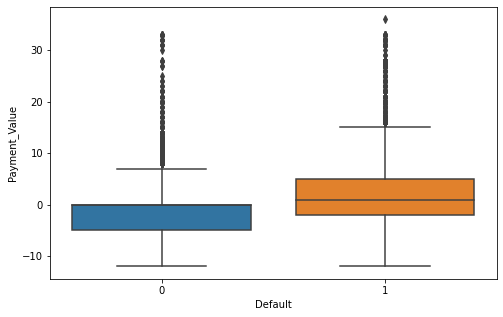

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data =new_df, x = 'Default', y = 'Payment_Value' )

Inference: We can few outlier inthe frame

In [ ]:
new_df['Dues'] = (new_df['BILL_AMT_APR']+new_df['BILL_AMT_MAY']+new_df['BILL_AMT_JUN']+new_df['BILL_AMT_JUL']+ new_df['BILL_AMT_AUG'] + new_df['BILL_AMT_SEPT'])-( new_df['PAY_AMT_APR']+ new_df['PAY_AMT_MAY']+ new_df['PAY_AMT_JUN']+ new_df['PAY_AMT_JUL']+ new_df['PAY_AMT_AUG']+ new_df['PAY_AMT_SEPT'])
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default,Payment_Value,Dues
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,7015
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,12077
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,90635
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,222946
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,23314,188764,1,1,1,47,1,1,1,2,...,39624,1860,2149,1489,1587,1489,1575,1,7,218267
46724,19077,50000,2,1,1,31,0,0,0,0,...,19847,2997,5706,6406,7382,3907,1761,1,0,51209
46725,9583,90000,2,3,2,23,0,0,0,0,...,44977,2227,2897,1956,2084,1955,3523,1,0,246847
46726,14784,10000,1,1,1,44,2,2,6,7,...,2400,0,0,0,0,0,0,1,31,14400


Inference = The amount of Dues of a customer

In [ ]:
#checking mean of a Dues 
# 0 = No default , 1 = Default
new_df.groupby('Default')['Dues'].mean()

Default
0    237459.487203
1    242626.518918
Name: Dues, dtype: float64

Inference: Dues values are more inthe default's one

**One Hot Encoding**

In [ ]:
new_df = pd.get_dummies(new_df,columns=['EDUCATION','MARRIAGE'])
new_df

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,Default,Payment_Value,Dues,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,2,24,2,2,-1,-1,-2,-2,...,1,-2,7015,0,1,0,0,1,0,0
1,2,120000,2,26,-1,2,0,0,0,2,...,1,3,12077,0,1,0,0,0,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,0,0,90635,0,1,0,0,0,1,0
3,4,50000,2,37,0,0,0,0,0,0,...,0,0,222946,0,1,0,0,1,0,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,0,-2,50290,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,23314,188764,1,47,1,1,1,2,1,1,...,1,7,218267,1,0,0,0,1,0,0
46724,19077,50000,2,31,0,0,0,0,0,0,...,1,0,51209,1,0,0,0,1,0,0
46725,9583,90000,2,23,0,0,0,0,0,0,...,1,0,246847,0,0,1,0,0,1,0
46726,14784,10000,1,44,2,2,6,7,7,7,...,1,31,14400,1,0,0,0,1,0,0


In [ ]:
# Dropping the columns 'EDUCATION_3' and 'MARRIAGE_3' since we have only Zero values
new_df.drop(['EDUCATION_3','MARRIAGE_3'],axis = 1, inplace = True)

In [ ]:
# get dummies for columns
new_df = pd.get_dummies(new_df, columns = ['PAY_SEPT',    'PAY_AUG',  'PAY_JUL',  'PAY_JUN',  'PAY_MAY',  'PAY_APR'], drop_first = True )

In [ ]:
new_df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,2,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,2,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,2,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
new_df.drop('ID',axis = 1, inplace = True)